In [1]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict\


if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [2]:
env = BlackjackEnv()

def print_observation(observation):
    score, dealer_score, usable_ace = observation
    print("Player Score: {} (Usable Ace: {}), Dealer Score: {}".format(
          score, usable_ace, dealer_score))

In [3]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    
    
    for i_episode in range(num_episodes):
        if i_episode % 1000 == 0:
            print("\rEpisode {}/{}.".format(i_episode, num_episodes), end="")
            sys.stdout.flush()
        
        observation = env.reset()
        states = []
        for t in range(100):
#             print_observation(observation)
            action = sample_policy(observation)
#             print("Taking action: {}".format( ["Stick", "Hit"][action]))
            states.append(observation)
            observation, reward, done, _ = env.step(action)
            
            if done:
                assert len(states) == t + 1
#                 print_observation(observation)
#                 print("Game end. Reward: {}\n".format(float(reward)))
                
                G = reward
                #虽然这里是 first-visit，但是对于21点，不会重复访问同一个state
                #所以这里省略了判断first visit
                for i in range(t, -1, -1): #backward
#                     print(i)
                    state = states[i]
                    returns_sum[state] += G
                    returns_count[state] += 1
                    G = discount_factor * G
                break
    
    # The final value function
    V = defaultdict(float)
    for state in returns_sum.keys():
        V[state] = returns_sum[state] / returns_count[state]
    # Implement this!

    return V    

In [4]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

Episode 0/10.

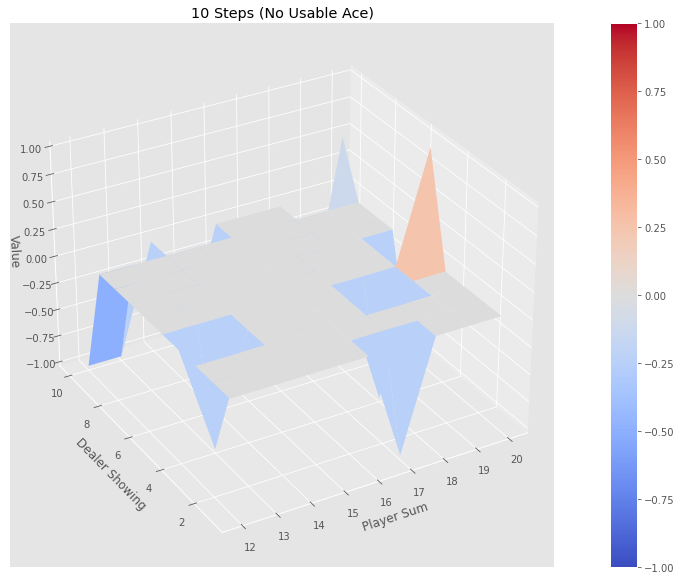

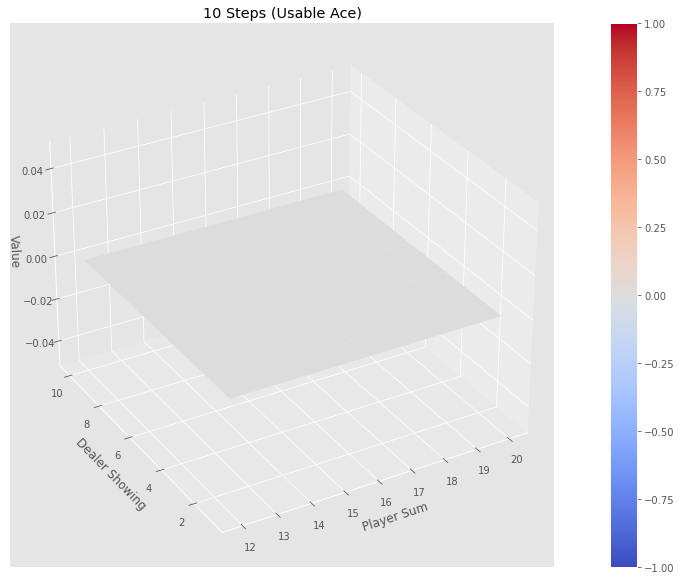

In [5]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10)
plotting.plot_value_function(V_10k, title="10 Steps")

Episode 9000/10000.

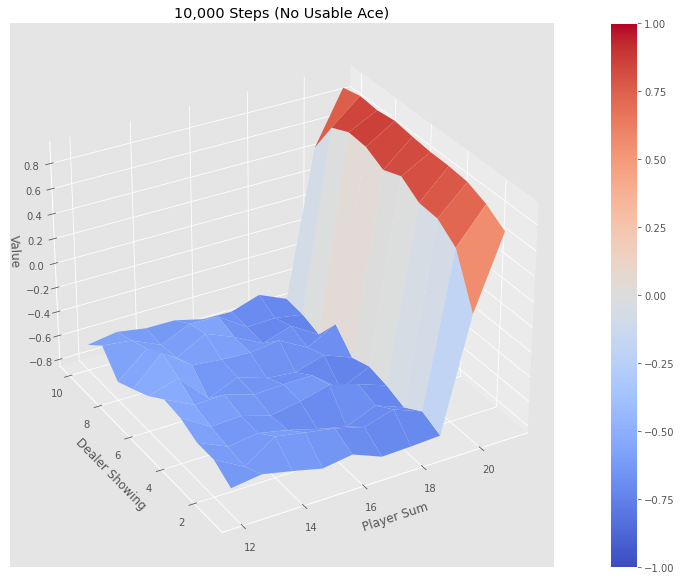

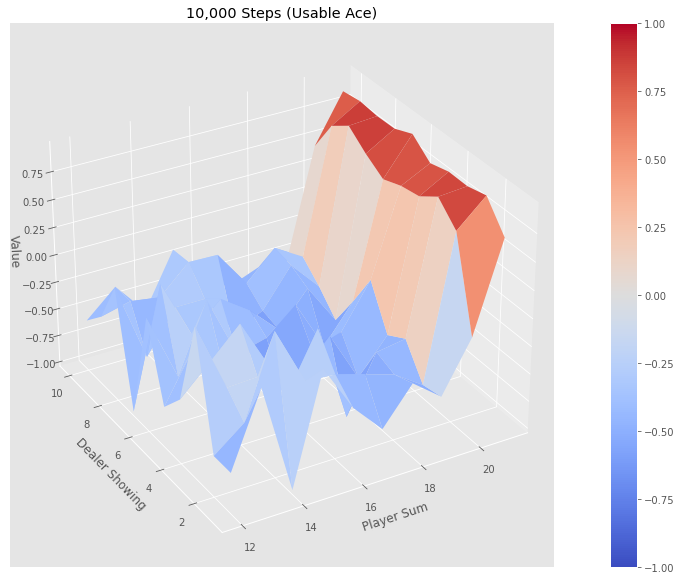

Episode 499000/500000.

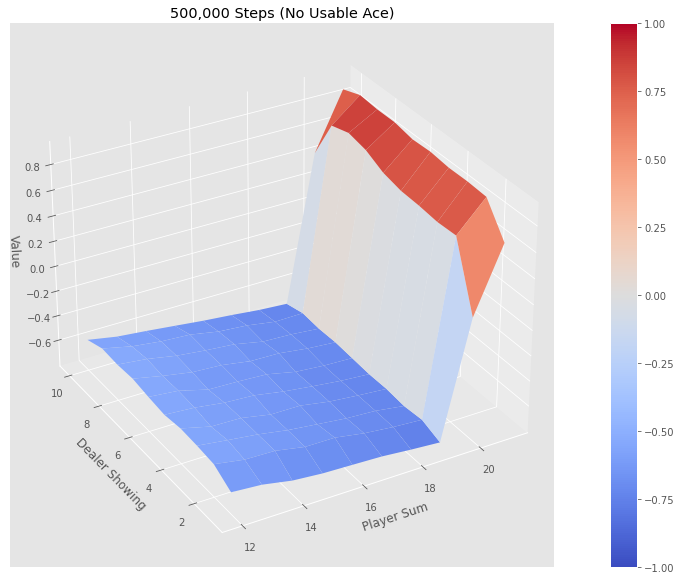

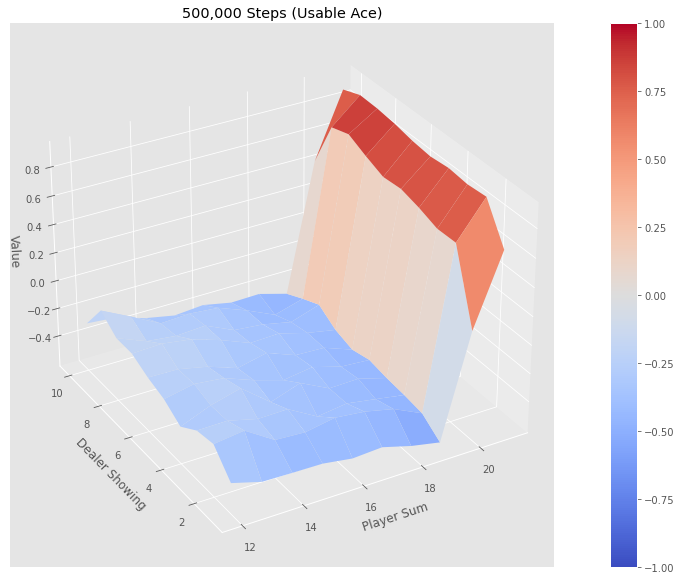

In [6]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")

Episode 1999000/2000000.

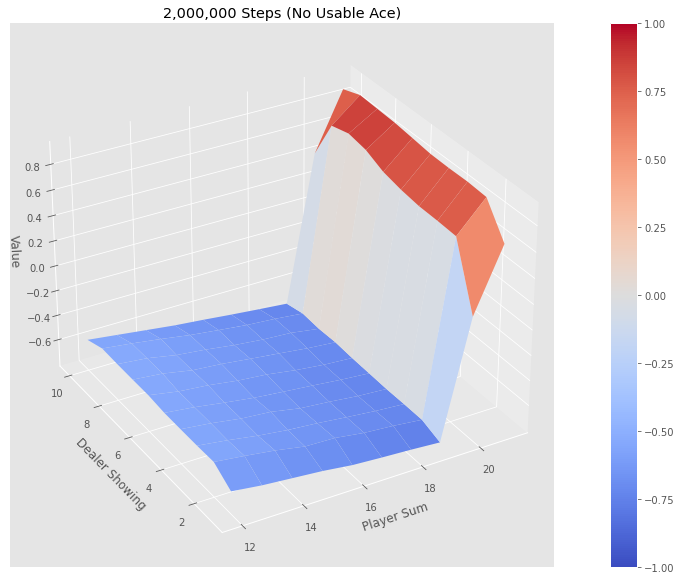

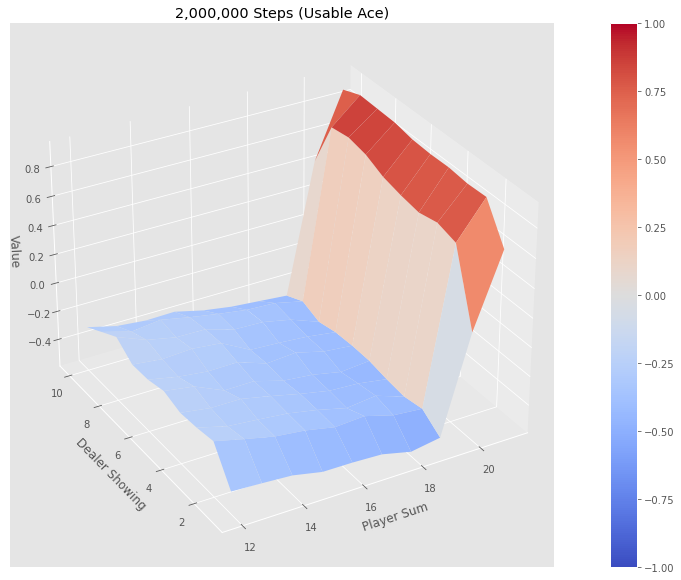

In [7]:
V_500k = mc_prediction(sample_policy, env, num_episodes=2000000)
plotting.plot_value_function(V_500k, title="2,000,000 Steps")